<a href="https://colab.research.google.com/github/aboltCD/aboltCD/blob/main/k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluando k-NN en el datset de Iris

En este notebook utilizaremos el clasificador k-NN en el dataset de Iris, y evaluaremos cuál es el k óptimo para este dataset.

Comenzamos por cargar las librerías necesarias:

In [189]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Ahora cargamos los datos, seteamos la lista de features y el target del modelo (variable a predecir)

In [190]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.loc[:, ['sepal length (cm)', 
               'sepal width (cm)',
               'petal length (cm)',
               'petal width (cm)']]

y = df.loc[:, 'target'].values

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Aplicamos el paso estándar de estandarización (sic):

In [191]:
scaler = StandardScaler()

# Ajusta en X (asumiendo que tu matriz de características es una matriz NumPy)
scaler.fit(X)

# Transform X
X = scaler.transform(X);



Ahora creamos el bucle que hará los cálculos de error y score para cada k distinto (error = 1 - score):

In [192]:
results = pd.Series(range(1))
errors = pd.Series(range(1)) 
for k in range(1,51):
  knn = KNeighborsClassifier(n_neighbors= k)  
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  results = results.append(pd.Series([score], index=[k]))
  errors = errors.append(pd.Series([1- score], index=[k]))

#con esta linea eliminamos la primera fila de la serie (punto vacío):
print(results)
results = results[1:]
errors = errors[1:]

0     0.000000
1     0.947368
2     0.947368
3     0.973684
4     0.973684
5     0.973684
6     0.973684
7     0.973684
8     0.973684
9     0.973684
10    0.973684
11    0.973684
12    0.973684
13    0.973684
14    0.973684
15    0.973684
16    0.973684
17    0.973684
18    0.973684
19    0.921053
20    0.921053
21    0.921053
22    0.921053
23    0.921053
24    0.921053
25    0.921053
26    0.921053
27    0.947368
28    0.894737
29    0.921053
30    0.894737
31    0.921053
32    0.894737
33    0.921053
34    0.894737
35    0.921053
36    0.868421
37    0.842105
38    0.842105
39    0.868421
40    0.842105
41    0.842105
42    0.842105
43    0.868421
44    0.842105
45    0.842105
46    0.842105
47    0.842105
48    0.842105
49    0.842105
50    0.842105
dtype: float64


Ahora construimos el plot:

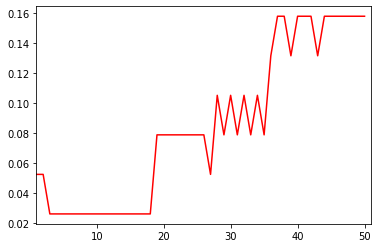

In [195]:
import matplotlib.pyplot as plt
#plot de los score
#plt.plot(results.index, results.values, color='green')

#plot de los errores
plt.plot(errors.index, errors.values, color='red')
plt.xlim([1, 51])
plt.show()